### 1. The Unified Framework

Given inputs $X \in \mathbb R^{n \times T}$, the goal is to learn $k$-dimensional outputs $Y \in \mathbb R^{k\times T}$ such that

$$\max_{Y \in \mathcal D_{Y}} \Phi^* \left(\frac{YX^{\top}}{T}\right) - \frac{1}{2}\Psi^* \left(\frac{YY^{\top}}{T}\right),$$

where $\Phi^*(\cdot)$ and $\Psi^*(\cdot)$ are Legendre transforms of strictly convex functions $\Phi(\cdot)$ and $\Psi(\cdot)$ (so that the optimal dual variables exist)

$$\Phi^*(C_{YX}):= \max_{W \in \mathcal D_{W}} \text{Tr}(WC_{YX}^{\top}) - \Phi(W),$$

$$\Psi^*(C_{YY}):= \max_{M \in \mathcal D_{M}} \text{Tr}(MC_{YY}^{\top}) - \Psi(M).$$

The these functions are non-decreasing when the optimal dual variables $W^*$ and $M^*$ are non-negative. Then, we can interpret the objective as *maximizing the correlation between inputs and outputs, while minimizing the auto-correlation of outputs*.

#### 1.1 Duality Gaps
After introducing Legendre dual variables, the original problem can be written as

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M\in \mathcal D_{M}}\frac{1}{2T}\text{Tr}\left(2WXY^{\top}- MYY^{\top}\right) - \Phi(W) + \frac{1}{2}\Psi(M). $$

There are other 5 problem after exchanging the order of optimization. It's easy to see that 2 of them are equivalent to the original

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M \in \mathcal D_{M}} \{\cdots\} = \max_{Y\in \mathcal D_{Y}} \min_{M\in \mathcal D_{M}} \max_{W\in \mathcal D_{W}}  \{\cdots\} = \max_{W\in \mathcal D_{W}} \max_{Y\in \mathcal D_{Y}} \min_{M \in \mathcal D_{M}} \{\cdots\};$$

Other 2 are equivalent and are the upper bound of the original

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M \in \mathcal D_{M}} \{\cdots\} \leq \color{orange}{\min_{M\in \mathcal D_{M}} \max_{Y\in \mathcal D_{Y}} \max_{W\in \mathcal D_{W}}  \{\cdots\}} = \color{orange}{\min_{M \in \mathcal D_{M}} \max_{W\in \mathcal D_{W}} \max_{Y\in \mathcal D_{Y}}  \{\cdots\}};$$

And the remaining one is a potentialy tighter upper bound of the original

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M \in \mathcal D_{M}} \{\cdots\} \leq \color{green}{\max_{W\in \mathcal D_{W}} \min_{M\in \mathcal D_{M}} \max_{Y\in \mathcal D_{Y}}  \{\cdots\}} \leq \color{orange}{\min_{M \in \mathcal D_{M}} \max_{W\in \mathcal D_{W}} \max_{Y\in \mathcal D_{Y}}  \{\cdots\}}.$$

We can show that when the optimal $\color{green}{M^*}$ is positive definite, 

$$\max_{Y\in \mathcal D_{Y}}\max_{W\in \mathcal D_{W}} \min_{M \in \mathcal D_{M}} \{\cdots\} = \color{green}{\max_{W\in \mathcal D_{W}} \min_{M\in \mathcal D_{M}} \max_{Y\in \mathcal D_{Y}}  \{\cdots\}}$$

However, the orange bound can be still loose.

#### 1.2 Neural Network Algorithms

We can use projected gradient descent / ascent to solve the green problem above, which leads to a bio-plausible neural network algorithm.

The steady activities of output neurons can be solve by offline projected gradient ascent
$$Y \leftarrow \text{proj}_{\mathcal D_{\bf Y}}\left[{\bf Y} + \eta_Y\frac{\partial \cdots}{\partial Y}\right] =  \text{proj}_{\mathcal D_{\bf Y}}\left[{\bf Y} + \frac{\eta_Y}{T}(WX - MY)\right],$$
or via online updates
$${\bf y}_t \leftarrow \text{proj}_{\mathcal D_{\bf y}}\left[{\bf y} + \eta_y(W{\bf x} - M{\bf y})\right].$$

The synaptic learning rules are
$$W\leftarrow \text{proj}_{\mathcal D_W} \left[W + \eta_W \frac{\partial \cdots}{\partial W}\right] = \text{proj}_{\mathcal D_W} \left[W + \eta_W\left( \frac{YX^{\top} }{T}- \Phi'(W)\right)\right];$$

and 

$$M\leftarrow \text{proj}_{\mathcal D_M} \left[M + \eta_M \frac{\partial \cdots}{\partial M}\right] = \text{proj}_{\mathcal D_M} \left[M + \frac{\eta_M}{2}\left( \frac{XX^{\top} }{T}- \Psi'(M)\right)\right].$$

We can also write the synaptic learning rule as the online updates

$$W\leftarrow \text{proj}_{\mathcal D_W} \left[W + \eta_W\left({\bf y}_t{\bf x}_t^{\top}- \Phi'(W)\right)\right],$$

$$M\leftarrow \text{proj}_{\mathcal D_M} \left[M + \frac{\eta_M}{2}\left({\bf y}_t{\bf y}_t^{\top}- \Psi'(M)\right)\right].$$

When $\eta_W \ll \eta_M$, we can show the global convergence of the neural network dynamics to the solution of the green problem by constructing a Lynapnov function.

#### 1.3 Similarity Matching as Special Choices of $\Phi$ and $\Psi$

Let $W,M,Y$ be unbounded, and $$\Phi(W) = \frac{1}{2}\text{Tr}WW^{\top}, \text{  and  } \Psi(M) = \frac{1}{2}\text{Tr}MM^{\top}.$$

We can verity that their Legendre transforms are 
$$\Phi^*(C) = \Psi^*(C) = \frac{1}{2}\|C\|_F^{2}.$$

The objective function becomes the similarity matching
$$\max_{Y}\left\{ \frac{1}{2}\left\|\frac{YX^{\top}}{T}\right\|_F^{2} - \frac{1}{4}\left\|\frac{YY^{\top}}{T}\right\|_F^{2}\right\} = \max_{Y} \left\{- \frac{1}{4}\left\|\frac{Y^{\top}Y}{T}-\frac{X^{\top}X}{T}\right\|_F^{2}+ \frac{1}{4}\left\|\frac{X^{\top}X}{T}\right\|_F^{2}\right\}$$

And the synaptic learning rules become hebbian plasticity with linear decay.

In the fast lateral interaction regime ($\eta_W \ll \eta_M$), the neural network dynamics will converge to the green upper bound. And we know that $M^*$ is always positive definite if input rank is at least $k$. The green problem equals the original.

The solution of similarity matching can be interpreted as "principal subspace projection", since $Y^*={M^*}^{-1}{W^*}X=U^{\top}X$, and we can show that $U^{\top}U = I_k$, $UU^{\top}XX^{\top}=XX^{\top}UU^{\top}$ $\Rightarrow U = U^{(\leq k)}_{x}Q, Q\in O(k)$, i.e., columns of $U$ are othornomal vectors that span the top-$k$ eigenspace of $XX^{\top}$. Therefore, this problem is also equivalent to PCA (up to rotation)
$$\max_{U\in\mathbb R^{m\times k}:U^{\top}U=I} \frac{1}{T} \text{Tr}U^{\top}XX^{\top}U$$
and the solutions 
$$Y^* = U^{\top}X = Q^{\top}\Sigma_{x}^{(\leq k)}\left(V^{(\leq k)}_x\right)^{\top}.$$

#### 1.4 Nonnegative Independent Component Analysis

Let $Y \in \mathbb R_{\geq 0}^{k \times T}$, $C_{XX} = XX^{\top} / T$ and
$$\Phi(W) = \frac{1}{2}\text{Tr}WC_{XX}W^{\top},\text{  and }\Psi(M)=\frac{1}{2}\text{Tr}MM^{\top}.$$
The optimal Legendre dual variable $W^* = C_{YX}C^{-1}_{XX}$, and $\Phi^*$ can be written as
$$\Phi^*(C_{YX}) = \frac{1}{2} \text{Tr}\left(C_{YX}C_{XX}^{-1}C_{YX}^{\top}\right).$$

The objective function becomes
$$\max_{Y \geq 0}\left\{ \frac{1}{2}\left\|\frac{Y\left(C_{XX}^{-1/2}X\right)^{\top}}{T}\right\|_F^{2} - \frac{1}{4}\left\|\frac{YY^{\top}}{T}\right\|_F^{2}\right\} = \max_{Y \geq 0} \left\{- \frac{1}{4}\left\|\frac{Y^{\top}Y}{T}-\frac{X^{\top}C_{XX}^{-1}X}{T}\right\|_F^{2}+ \frac{1}{4}\left\|\frac{X^{\top}C_{XX}^{-1}X}{T}\right\|_F^{2}\right\}$$

#### 1.5 Canonical Correlation Analysis 
Suppose there are multiple inputs $\{X_i \in \mathbb R^{n_i \times T}\}$, and let $C_{X_iX_i} = X_iX_i^{\top}/T$

We can write our objective as

$$\max_{Y} \sum_{i} \Phi^*_i \left(\frac{YX_i^{\top}}{T}\right) - \frac{1}{2}\Psi^* \left(\frac{YY^{\top}}{T}\right),$$

where $\Phi^{*}_i$ is similar to ICA case
$$\Phi^*_i(C_{YX_i}) = \frac{1}{2}\text{Tr}\left(C_{YX_i}C_{X_iX_i}^{-1}C_{YX_i}^{\top}\right)$$

The objective function is 
$$\max_{Y}\left\{ \frac{1}{2}\sum_{i}\left\|\frac{Y\left(C_{X_iX_i}^{-1/2}X_i\right)^{\top}}{T}\right\|_F^{2} - \frac{1}{4}\left\|\frac{YY^{\top}}{T}\right\|_F^{2}\right\} = \max_{Y} \left\{- \frac{1}{4}\left\|\frac{Y^{\top}Y}{T}-\sum_{i}\frac{X_{i}^{\top}C_{X_{i}X_{i}}^{-1}X_{i}}{T}\right\|_F^{2}+ \sum_{i}\frac{1}{4}\left\|\frac{X_{i}^{\top}C_{X_{i}X_{i}}^{-1}X_{i}}{T}\right\|_F^{2}\right\}.$$

Therefore this problem is equivalent to the principal subspace projection by considering the wighted variable 
$$\Xi = \left[\begin{matrix}C_{X_1X_1}^{-1/2}X_1\\\vdots\\C_{X_iX_i}^{-1/2}X_i\\\vdots\end{matrix}\right],$$
and the goal is to minimize $\min_{Y}\|Y^{\top}Y - \Xi^{\top}\Xi\|$.

As shown above, solving $Y$ is the same as projecting $\Xi$ to its top-$k$ principal subspace. I.e., let $n= \sum_i n_i $
$$\max_{\tilde U\in \mathbb R^{n\times k}:\tilde U^{\top}\tilde U = I} \frac{1}{T}\text{Tr}\tilde U^{\top} \Xi\Xi^{\top} \tilde U = \max_{\tilde U\in \mathbb R^{n\times k}:\tilde U^{\top} \tilde U = I} \frac{1}{T}\text{Tr}\tilde U^{\top} \left[\begin{matrix}I & C_{X1X1}^{-1/2}C_{X_1 X_2}C_{X2X2}^{-1/2} & \cdots & C_{X_i X_i}^{-1/2}C_{X_i X_j}C_{X_j X_j}^{-1/2} & \cdots \\ C_{X2X2}^{-1/2}C_{X_2 X_1}C_{X1X1}^{-1/2} & I & \cdots & C_{X_{i+1} X_{i+1}}^{-1/2}C_{X_{i+1} X_j}C_{X_j X_j}^{-1/2} & \cdots \\ \vdots & \vdots & \ddots & \vdots & \vdots  \end{matrix}\right] \tilde U$$

If we decompose $\tilde U = \left[\begin{matrix}\tilde U_{X_i}\\\vdots\\ \tilde U_{X_i}\\\vdots\end{matrix}\right]$, the above problem can be equivalently written as
$$\max_{\tilde U_{X_i} \in \mathbb R^{n_i\times k}, \forall i} \sum_{i < j} \text{Tr} \tilde U_{X_i}^{\top}C_{X_i X_i}^{-1/2}C_{X_i X_j} C_{X_j X_j}^{-1/2} \tilde U_{X_j}, \text{ s.t. } \sum_{i} \tilde U_{X_i}^{\top} \tilde U_{X_i} = I.$$

Or define $U_{X_i} := C_{X_iX_i}^{-1/2} \tilde U_{X_i}$,

$$\max_{U_{X_i} \in \mathbb R^{n_i\times k}, \forall i} \sum_{i < j} \text{Tr} U_{X_i}^{\top}C_{X_i X_j} U_{X_j}, \text{ s.t. } \sum_{i} U_{X_i}^{\top}C_{X_iX_i}U_{X_i} = I.$$

The solution 
$$Y^* = \sum_i \tilde{M}^{-1} \tilde{W}_i C_{X_i X_i}^{-1/2 }X_i = \sum_i \tilde U_{X_i}^{\top}C_{X_i X_i}^{-1/2} X_i = \sum_i U_{X_i}^{\top} X_i,$$ 
which linearly projects each variable to a subspace which correlate most with all the other variables.

The learned feedforwad weights $$W_j = \tilde{W}_jC_{X_j X_j}^{-1/2} = \frac{1}{T}YX_j^{\top}C_{X_j X_j}^{-1},$$ 
and the learned lateral weights are $$M = \tilde M = \frac{1}{T}YY^{\top} = \sum_{ij}U_{X_i}^{\top}C_{X_i X_j}U_{X_j}.$$

### 2. Numerical Simulation

#### 2.1 MNIST Dataset

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, tnrange

sns.set_context('talk')

# use gpu acceleration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
mnist = fetch_openml('mnist_784', cache=True)

In [3]:
# take first 1000 images and normalize them as inputs
# crop the image to 16x16 avoid singularity of correlation
X = np.array(mnist['data'][:1000]).reshape(1000,28,28)[:,6:22,6:22].reshape(1000,-1)
# centered: mean over time = 0
X_centered = (X - X.mean(0)).T 
X_centered = X_centered/np.abs(X_centered).max()
X_centered.shape

(256, 1000)

In [4]:
X = X_centered

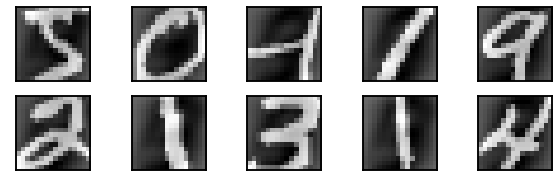

In [5]:
# show example inputs
fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(X[:,i].reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 2.2 General Correlation Game

In [6]:
from functools import partial
from scipy.stats import ortho_group
from typing import Iterable, Dict

class CorrGame(nn.Module):
    def __init__(self, n, k, Phi, Psi, 
                 constraints = None, eta=None, dPhi=None, dPsi=None, device='cpu'):
        super(CorrGame, self).__init__()
        self.n, self.k = n, k
        self.multi_inputs = False
        if isinstance(self.n, Iterable):
            self.multi_inputs = True
            self.W = [torch.Tensor(k, nx).normal_(0,1e-2).to(device) for nx in self.n]
        else:
            self.W = torch.Tensor(k, n).normal_(0,1e-2).to(device)
        self.M = torch.Tensor(k, k).normal_(0,1e-2).to(device)
        self.M = self.M.mm(self.M.transpose(0,1))
        self.Y = None
        self.Phi = Phi
        self.Psi = Psi
        
        self.proj = constraints if constraints else {var: lambda x:x for var in ['Y', 'W', 'M']}
        
        self.dPhi = dPhi if dPhi else self.derivative(self.Phi)
        self.dPsi = dPsi if dPsi else self.derivative(self.Psi)
        
        self.eta_W = eta['W'] if eta else 0.1
        self.eta_M = eta['M'] if eta else 0.05
        self.eta_Y = eta['Y'] if eta else 0.01

        self.device = device
    
    # auto derivative if not given
    def derivative(self, fn):
        def df(fn, w, x):
            w = Variable(w, requires_grad=True)
            y = fn(w, x)
            y.backward()
            return w.grad
        return partial(df, fn)
    
    # correlation AB' / T
    def corr(self, A, B, normalize=True):
        return A.mm(B.transpose(0,1)) / A.size(1)
    
    # offline or online updates
    def learn(self, X, mode='YWM', init='ortho', closed_form=None, errs=None, step_limit=1000):
        
        # initialize Y
        if self.Y is None: 
            if self.multi_inputs:
                self.Y = 0
                for i, nx in enumerate(self.n):
                    if init == 'ortho':
                        init_filter = ortho_group.rvs(nx)[:self.k]
                        init_filter = torch.Tensor(init_filter).to(self.device)
                        self.Y += init_filter.mm(X[i])
                        self.W[i] = self.M.mm(init_filter)
                    elif init == 'whiten':
                        init_filter = ortho_group.rvs(nx)[:self.k]
                        init_filter = torch.Tensor(init_filter).to(self.device)
                        U_x, S_x, Vh_x = torch.svd(X[i]/np.sqrt(X[i].size(1)))
                        init_filter = init_filter.mm(U_x.mm(torch.diag(1/S_x)).mm(U_x.transpose(0,1)))
                        self.Y += init_filter.mm(X[i])
                        self.W[i] = self.M.mm(init_filter)
                    elif isinstance(init, Dict):
                        self.Y = init['Y']
                        self.W = init['W']
                        self.M = init['M']
                        break
                    self.W[i] = self.proj['W'](self.W[i])
                self.Y = self.proj['Y'](self.Y)
                self.M = self.proj['M'](self.M)
            else:
                if init == 'ortho': 
                    init_filter = ortho_group.rvs(self.n)[:self.k]
                    init_filter = torch.Tensor(init_filter).to(self.device)
                    self.Y = init_filter.mm(X) 
                    self.W = self.M.mm(init_filter)
                elif init == 'whiten':
                    init_filter = ortho_group.rvs(self.n)[:self.k]
                    init_filter = torch.Tensor(init_filter).to(self.device)
                    U_x, S_x, Vh_x = torch.svd(X/np.sqrt(X.size(1)))
                    init_filter = init_filter.mm(U_x.mm(torch.diag(1/S_x)).mm(U_x.transpose(0,1)))
                    self.Y = init_filter.mm(X) 
                    self.W = self.M.mm(init_filter)
                elif isinstance(init, Dict):
                    self.Y = init['Y']
                    self.W = init['W']
                    self.M = init['M']
                self.W = self.proj['W'](self.W)
                self.Y = self.proj['Y'](self.Y)
                self.M = self.proj['M'](self.M)
            
        eta_Y, eta_W, eta_M = self.eta_Y, self.eta_W, self.eta_M
        
        # solving the original problem, offline only
        if mode == 'YWM':
            errs_W = errs['W'] if errs else 1e-6
            errs_M = errs['M'] if errs else 1e-6

            if closed_form:
                if self.multi_inputs:
                    for i, nx in enumerate(self.n):
                        self.W[i] = closed_form['W'](self.Y, self.W[i], self.M, X[i]) 
                else:
                    self.W = closed_form['W'](self.Y, self.W, self.M, X)
                self.M = closed_form['M'](self.Y, self.W, self.M, X)
            else:
                if self.multi_inputs:
                    for i, nx in enumerate(self.n):
                        _step = 0
                        delta_W = self.corr(self.Y, X[i]) - self.dPhi(self.W[i], X[i])
                        while (delta_W * delta_W).sum() > errs_W and _step < step_limit:
                            _step += 1
                            self.W[i] = self.proj['W'](self.W[i] + eta_W * delta_W)
                            delta_W = self.corr(self.Y, X[i]) - self.dPhi(self.W[i], X[i])        
                else:
                    _step = 0
                    delta_W = self.corr(self.Y, X) - self.dPhi(self.W, X)
                    while (delta_W * delta_W).sum() > errs_W and _step < step_limit:
                        _step += 1
                        self.W = self.proj['W'](self.W + eta_W * delta_W)
                        delta_W = self.corr(self.Y, X) - self.dPhi(self.W, X)

                _step = 0
                delta_M = 0.5 * (self.corr(self.Y, self.Y) - self.dPsi(self.M, X))
                while (delta_M * delta_M).sum() > errs_M and _step < step_limit:
                    _step += 1
                    self.M = self.proj['M'](self.M + eta_M * delta_M)
                    delta_M = 0.5 * (self.corr(self.Y, self.Y) - self.dPsi(self.M, X))
                    
            if self.multi_inputs:
                delta_Y = - self.M.mm(self.Y)
                for i, nx in enumerate(self.n):
                    delta_Y += self.W[i].mm(X[i])
                delta_Y = delta_Y / self.Y.size(1)
            else:
                delta_Y = (self.W.mm(X) - self.M.mm(self.Y)) / X.size(1)
            self.Y = self.proj['Y'](self.Y + eta_Y * delta_Y)
        
        # solving the dual problems with NN, can be both online or offline
        elif mode=='NN':
            errs_Y = errs['Y'] if errs else 1e-6
            
            if closed_form:
                self.Y = closed_form['Y'](self.Y, self.W, self.M, X)
            else:
                _step = 0
                if self.multi_inputs:
                    delta_Y = - self.M.mm(self.Y)
                    for i, nx in enumerate(self.n):
                        delta_Y += self.W[i].mm(X[i])
                    delta_Y = delta_Y / self.Y.size(1)
                else:
                    delta_Y = (self.W.mm(X) - self.M.mm(self.Y)) / X.size(1)
                while (delta_Y * delta_Y).sum() > errs_Y and _step < step_limit:
                    _step += 1
                    self.Y = self.proj['Y'](self.Y + eta_Y * delta_Y)
                    if self.multi_inputs:
                        delta_Y = - self.M.mm(self.Y)
                        for i, nx in enumerate(self.n):
                            delta_Y += self.W[i].mm(X[i])
                        delta_Y = delta_Y / self.Y.size(1)
                    else:
                        delta_Y = (self.W.mm(X) - self.M.mm(self.Y)) / X.size(1)
            
            if self.multi_inputs:
                for i, nx in enumerate(self.n):
                    delta_W = self.corr(self.Y, X[i]) - self.dPhi(self.W[i], X[i])
                    self.W[i] = self.proj['W'](self.W[i] + eta_W * delta_W)
            else:
                delta_W = self.corr(self.Y, X) - self.dPhi(self.W, X)
                self.W = self.proj['W'](self.W + eta_W * delta_W)
            
            delta_M = 0.5 * (self.corr(self.Y, self.Y) - self.dPsi(self.M, X))
            self.M = self.proj['M'](self.M + eta_M * delta_M)
        
        # general projected graidient decent ascent, can be both online or offline 
        elif mode == 'GDA':
            if self.multi_inputs:
                delta_Y = - self.M.mm(self.Y)
                for i, nx in enumerate(self.n):
                    delta_Y += self.W[i].mm(X[i])
                    delta_W = self.corr(self.Y, X[i]) - self.dPhi(self.W, X[i])
                    
                    self.W[i] = self.proj['W'](self.W[i] + eta_W*delta_W)
                    
                delta_M = 0.5*(self.corr(self.Y, self.Y) - self.dPsi(self.M, X))
                
                self.M = self.proj['M'](self.M + eta_M*delta_M)
                self.Y = self.proj['Y'](self.Y + eta_Y*delta_Y)
            else:
                delta_Y = self.W.mm(X) - self.M.mm(self.Y)
                delta_W = self.corr(self.Y, X) - self.dPhi(self.W, X)
                delta_M = 0.5*(self.corr(self.Y, self.Y) - self.dPsi(self.M, X))

                self.M = self.proj['M'](self.M + eta_M*delta_M)
                self.W = self.proj['W'](self.W + eta_W*delta_W)
                self.Y = self.proj['Y'](self.Y + eta_Y*delta_Y)
    
    
    # evaluate objective function
    def objective(self, X):
        if self.multi_inputs:
            obj =  - 0.5 * (self.M * self.corr(self.Y, self.Y)).sum() + 0.5 * self.Psi(self.M, X)
            for i, nx in enumerate(self.n):
                obj += (self.W[i] * self.corr(self.Y, X[i])).sum() - self.Phi(self.W[i], X[i])
            return obj
        else:
            return (self.W * self.corr(self.Y, X)).sum() - 0.5 * (self.M * self.corr(self.Y, self.Y)).sum()\
                    - self.Phi(self.W, X) + 0.5 * self.Psi(self.M, X)

In [7]:
# offline training and logger

class Logger(object):
    def __init__(self, evals):
        self.evals = evals
        self.history = {e: [] for e in evals.keys()}
        
    def log(self, model, train_data):
        for e in self.evals.keys():
            self.history[e].append(self.evals[e](model, train_data))
    
    def clear(self):
        self.history = {e: [] for e in evals.keys()}

def train_offline(model, train_data, logger, init='ortho', mode='YWM', closed_form=None, niter=1000):
    for _ in tnrange(niter):
        model.learn(train_data, init=init, mode=mode, closed_form=closed_form)
        logger.log(model, train_data)

#### 2.3 Similarity Matching - Solving the Original Problem

In [8]:
# substantialize similarity matching principle for centered MNIST data
sim_match = CorrGame(n=256, k=10, 
                        Phi=lambda W, X: (W*W).sum()/2,
                        Psi=lambda M, X: (M*M).sum()/2,
                        dPhi = lambda W, X:W,
                        dPsi = lambda M, X:M,
                        constraints = None,
                        eta= {'Y': 10.0, 'W': 0.001, 'M': 0.001},
                        device=device)

# provide known closed form solutions to W and M
closed_form_dual = {"W": lambda y, w, m, x: sim_match.corr(y,x),
                    "M": lambda y, w, m, x: sim_match.corr(y,y)}

In [9]:
# substantialize similarity matching logger

def similarity_diff(model, x):
    diff = x.transpose(0,1).mm(x) - model.Y.transpose(0,1).mm(model.Y)
    diff = diff / x.size(1)
    return (diff * diff).sum()

sim_match_logger = Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y|^2": lambda model, x: (model.Y * model.Y).sum(),
    "|W|^2": lambda model, x: (model.W * model.W).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "|XX-YY|^2": similarity_diff
})

In [10]:
%%time
train_offline(sim_match, torch.Tensor(X).to(device), sim_match_logger, 
              mode='YWM', closed_form=closed_form_dual, niter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 1.38 s, sys: 2.57 s, total: 3.95 s
Wall time: 642 ms


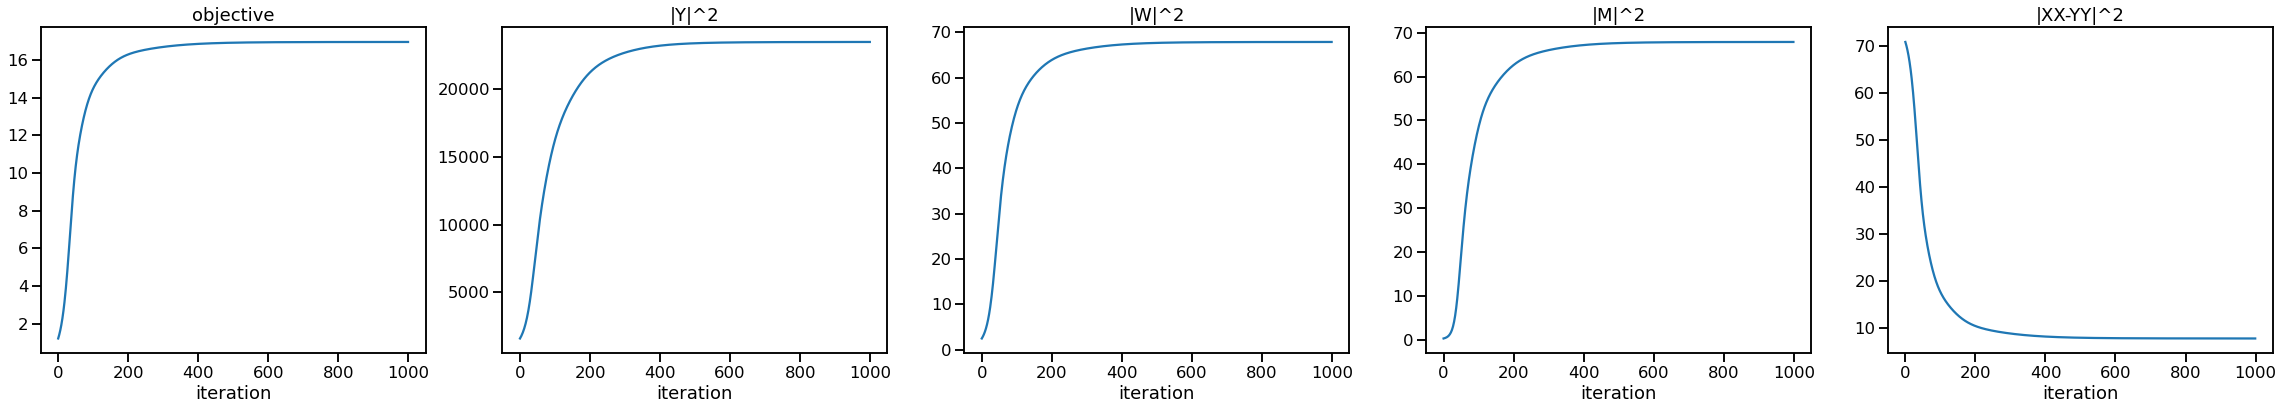

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
for ax, eval_key in zip(axs, sim_match_logger.history.keys()):
    ax.plot([s.cpu().numpy() for s in sim_match_logger.history[eval_key]])
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
plt.show()

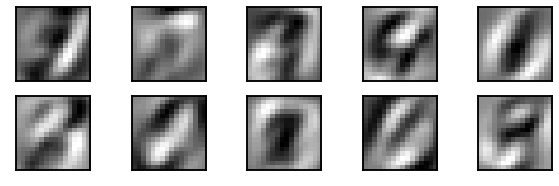

In [12]:
# show feature W
fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(sim_match.W[i].cpu().numpy().reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

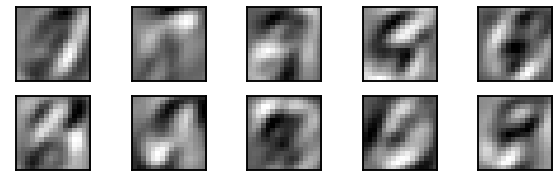

In [13]:
# show filter M^(-1)W, which should be the top PCs of the data
fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(torch.inverse(sim_match.M).mm(sim_match.W)[i].cpu().numpy().reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
# check the relationship between CorrGame and SimMatch
a = torch.Tensor(X).to(device)
print(((a.mm(a.transpose(0,1))/a.size(1))**2).sum() / 4 - sim_match_logger.history["|XX-YY|^2"][-1]/4)
print(sim_match_logger.history["objective"][-1])

tensor(16.9693, device='cuda:0')
tensor(16.9693, device='cuda:0')


In the below blocks, I show the general case where we can obtain the solution for any definitions of $\Phi(\cdot)$ and $\Psi(\cdot)$, without knowing their analytical direvatives and any closed-form solutions. 
The offline learning becomes much slower but this can work for any strictly convex functions $\Phi(\cdot)$ and $\Psi(\cdot)$. It will speed up significantly if the analytical form of $\Phi'$ and $\Psi'$ are provided.

In [15]:
# substantialize similarity matching principle for centered MNIST data
# don't know the regularizer and closed-form solutions

sim_match_auto = CorrGame(n=256, k=10, 
                        Phi=lambda W, X: (W*W).sum()/2,
                        Psi=lambda M, X: (M*M).sum()/2,
                        constraints = None,
                        eta= {'Y': 10.0, 'W': 0.001, 'M': 0.001},
                        device=device)

In [16]:
# substantialize similarity matching logger - auto

sim_match_auto_logger = Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y|^2": lambda model, x: (model.Y * model.Y).sum(),
    "|W|^2": lambda model, x: (model.W * model.W).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "|XX-YY|^2": similarity_diff
})

In [17]:
%%time
train_offline(sim_match_auto, torch.Tensor(X).to(device), sim_match_auto_logger, niter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 6min 14s, sys: 18.5 s, total: 6min 32s
Wall time: 6min 22s


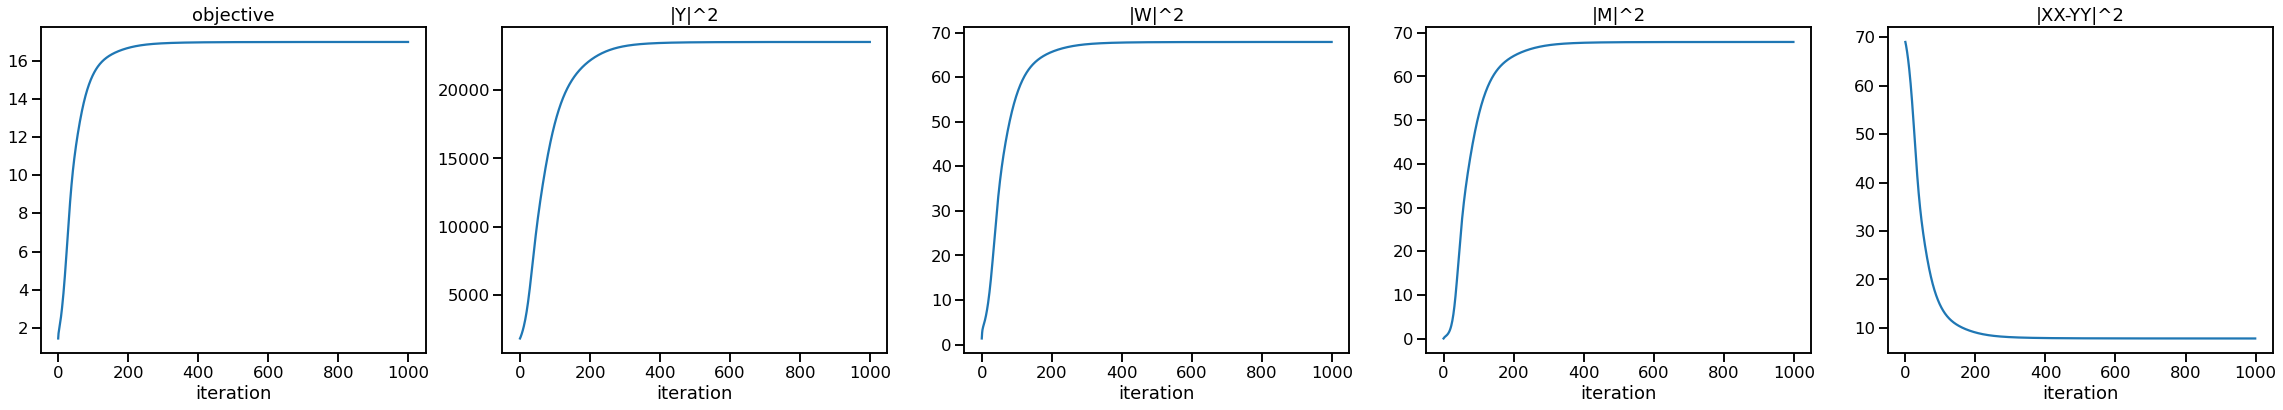

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
for ax, eval_key in zip(axs, sim_match_auto_logger.history.keys()):
    ax.plot([s.cpu().numpy() for s in sim_match_auto_logger.history[eval_key]])
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
plt.show()

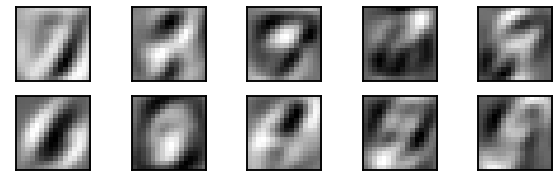

In [19]:
# show learned feature W
fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(sim_match_auto.W[i].cpu().numpy().reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

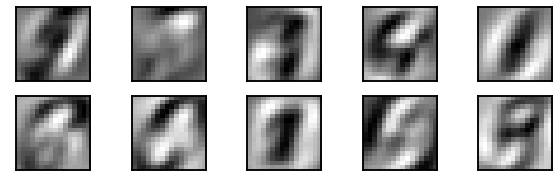

In [20]:
# show filter M^(-1)W, which should span the top PCs of the data
fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(torch.inverse(sim_match_auto.M).mm(sim_match.W)[i].cpu().numpy().reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 2.4 Similarity Matching - Neural Network Algorithms

In [21]:
# substantialize similarity matching principle for centered MNIST data
sim_match_nn = CorrGame(n=256, k=10, 
                        Phi=lambda W, X: (W*W).sum()/2,
                        Psi=lambda M, X: (M*M).sum()/2,
                        dPhi = lambda W, X:W,
                        dPsi = lambda M, X:M,
                        constraints = None,
                        eta= {'Y': 0.01, 'W': 0.01, 'M': 0.1},
                        device=device)

# provide the known closed form solution to Y
closed_form_y = {"Y": lambda y, w, m, x: torch.inverse(m).mm(w).mm(x)}

In [22]:
# substantialize similarity matching logger

sim_match_nn_logger = Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y|^2": lambda model, x: (model.Y * model.Y).sum(),
    "|W|^2": lambda model, x: (model.W * model.W).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "|XX-YY|^2": similarity_diff
})

In [23]:
%%time
train_offline(sim_match_nn, torch.Tensor(X).to(device), sim_match_nn_logger, 
              mode='NN', 
              closed_form=closed_form_y, 
              niter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 1.49 s, sys: 2.45 s, total: 3.94 s
Wall time: 903 ms


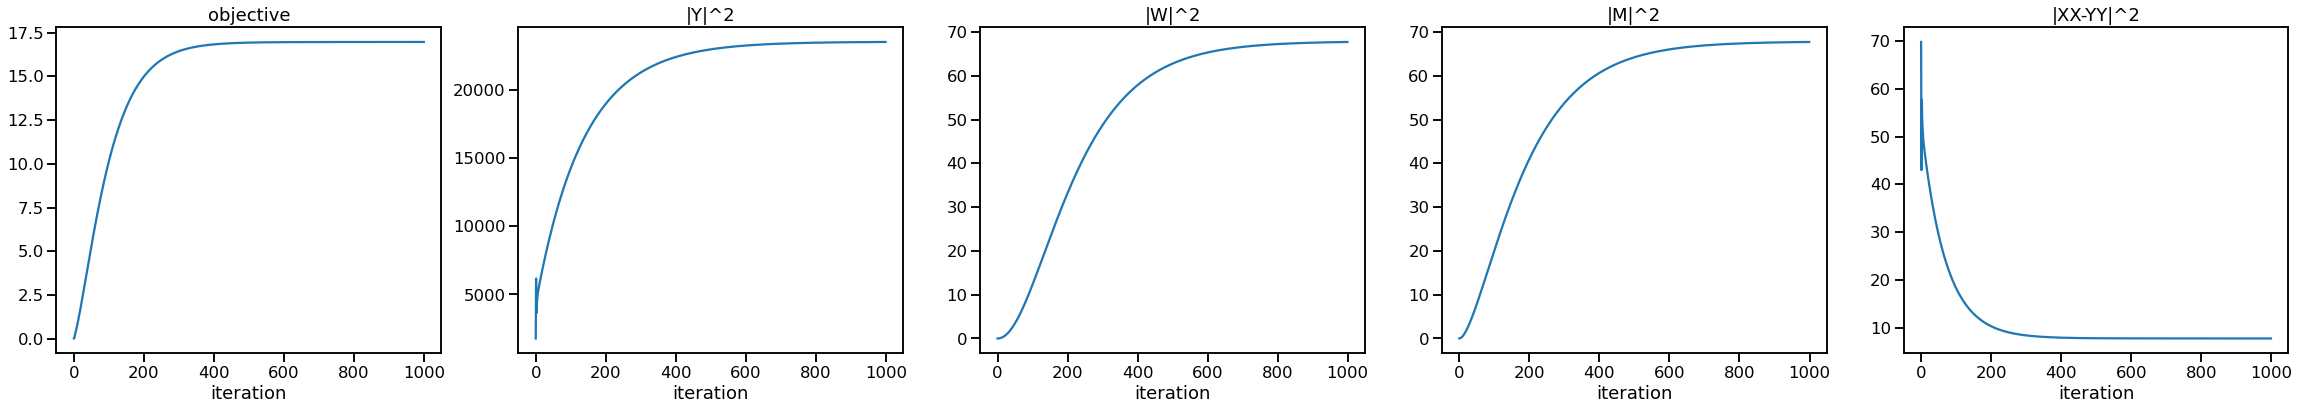

In [24]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
for ax, eval_key in zip(axs, sim_match_nn_logger.history.keys()):
    ax.plot([s.cpu().numpy() for s in sim_match_nn_logger.history[eval_key]])
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
plt.show()

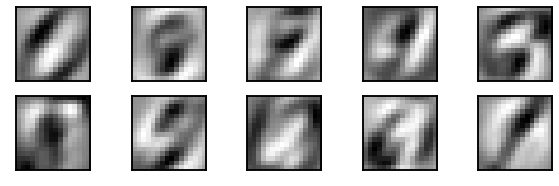

In [25]:
# show feature W
fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(sim_match_nn.W[i].cpu().numpy().reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##### 2.4.1. Effects of Learnig Rates

In [26]:
# substantialize similarity matching principle for centered MNIST data
# explore the effect of learning rates

base_eta = 0.01
tau_list = [0.1, 0.5, 1.0, 1.5]

sim_match_nn_rls = {tau: CorrGame(n=256, k=10, 
                            Phi=lambda W, X: (W*W).sum()/2,
                            Psi=lambda M, X: (M*M).sum()/2,
                            dPhi = lambda W, X:W,
                            dPsi = lambda M, X:M,
                            constraints = None,
                            eta= {'Y': 0.01, 'W': base_eta, 'M': base_eta/tau},
                            device=device)
                    for tau in tau_list}

# provide the known closed form solution to Y
closed_form_y = {"Y": lambda y, w, m, x: torch.inverse(m).mm(w).mm(x)}

In [27]:
# substantialize similarity matching logger

sim_match_nn_rls_loggers = {tau: Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y|^2": lambda model, x: (model.Y * model.Y).sum(),
    "|W|^2": lambda model, x: (model.W * model.W).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "|XX-YY|^2": similarity_diff
}) for tau in tau_list}

In [28]:
%%time
for tau in tau_list:
    train_offline(sim_match_nn_rls[tau], torch.Tensor(X).to(device), sim_match_nn_rls_loggers[tau], 
                  mode='NN', 
                  closed_form=closed_form_y, 
                  niter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 5.9 s, sys: 9.9 s, total: 15.8 s
Wall time: 3.77 s


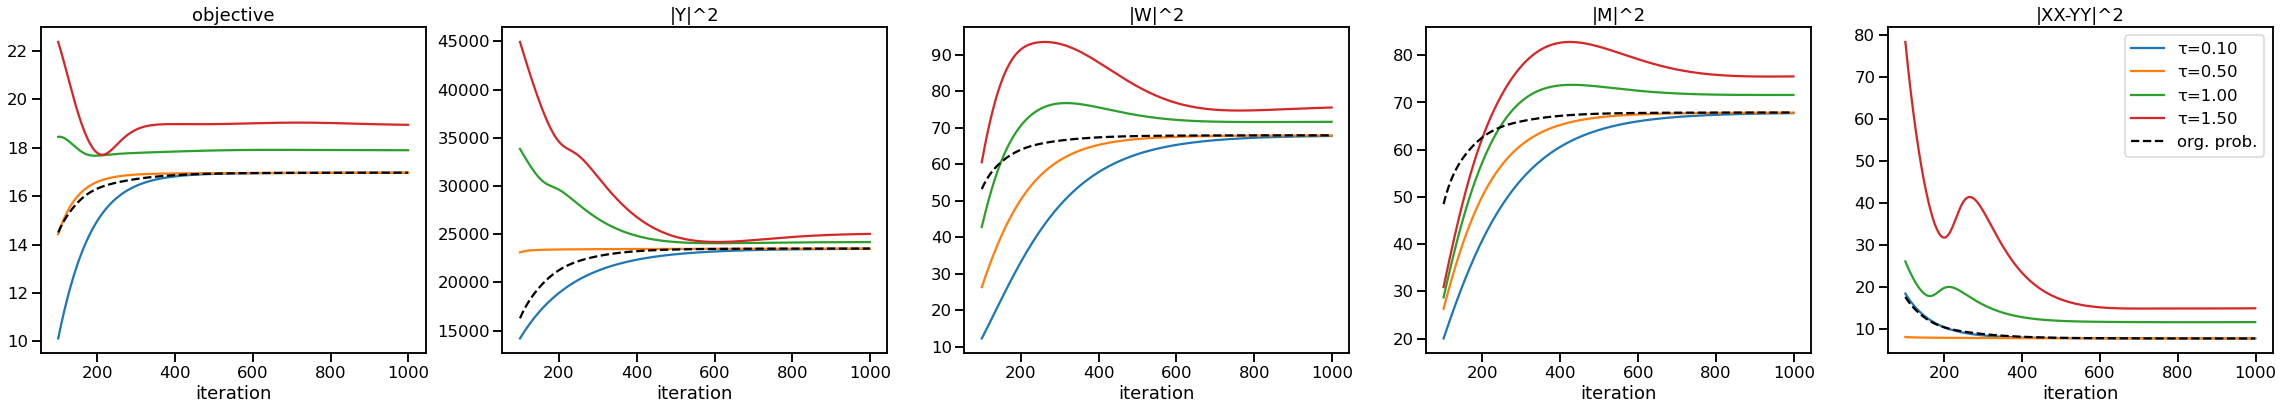

In [29]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
for tau in tau_list:
    for ax, eval_key in zip(axs, sim_match_nn_rls_loggers[tau].history.keys()):
        ax.plot(range(1000)[100:], [s.cpu().numpy() for s in sim_match_nn_rls_loggers[tau].history[eval_key]][100:], 
                label="τ={:.2f}".format(tau))
        ax.set_title(eval_key)
        ax.set_xlabel("iteration")

for ax, eval_key in zip(axs, sim_match_logger.history.keys()):
    ax.plot(range(1000)[100:], [s.cpu().numpy() for s in sim_match_logger.history[eval_key]][100:], 
            'k--', label="org. prob.")
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
        
plt.legend()
plt.show()

#### 2.5 Nonnegative Similarity Matching - Solving the Original Problem

In [30]:
# substantialize similarity matching principle for centered MNIST data
# Y (and M) are nonnegative
# undercomplete, offline setting, rank is up to k

nonneg_sim_match = CorrGame(n=256, k=10, 
                        Phi=lambda W, X: (W*W).sum()/2,
                        Psi=lambda M, X: (M*M).sum()/2,
                        dPhi = lambda W, X:W,
                        dPsi = lambda M, X:M,
                        constraints = {'Y': F.relu,
                                       'W': lambda x:x,
                                       'M': lambda x:x},
                        eta= {'Y': 30.0, 'W': 0.001, 'M': 0.001},
                        device=device)

# provide known closed form solutions to W and M
closed_form_dual = {"W": lambda y, w, m, x: nonneg_sim_match.corr(y,x),
                    "M": lambda y, w, m, x: nonneg_sim_match.corr(y,y)}

In [31]:
# substantialize similarity matching logger

nonneg_sim_match_logger = Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y|^2": lambda model, x: (model.Y * model.Y).sum(),
    "|W|^2": lambda model, x: (model.W * model.W).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "|XX-YY|^2": similarity_diff
})

In [32]:
%%time
train_offline(nonneg_sim_match, torch.Tensor(X).to(device), nonneg_sim_match_logger, 
              mode='YWM', closed_form=closed_form_dual, niter=3000)

  0%|          | 0/3000 [00:00<?, ?it/s]

CPU times: user 2.26 s, sys: 2.44 s, total: 4.7 s
Wall time: 1.78 s


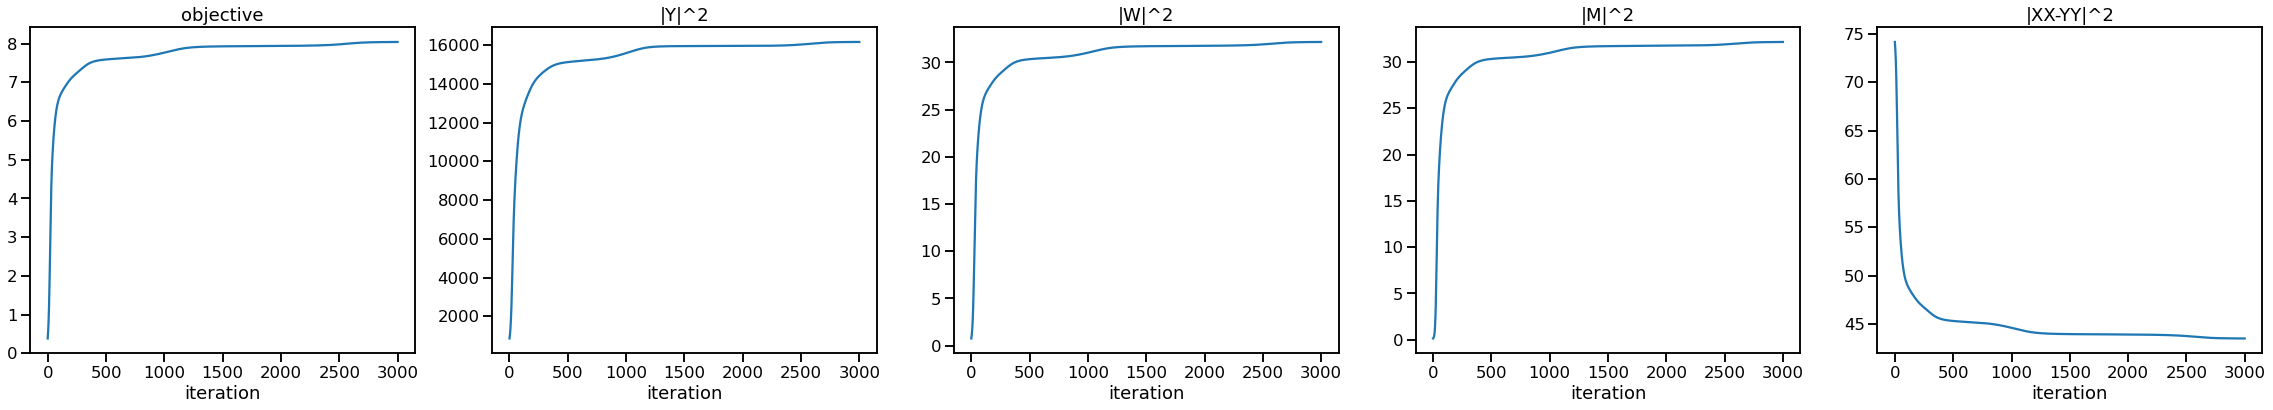

In [33]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
for ax, eval_key in zip(axs, nonneg_sim_match_logger.history.keys()):
    ax.plot([s.cpu().numpy() for s in nonneg_sim_match_logger.history[eval_key]])
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
plt.show()

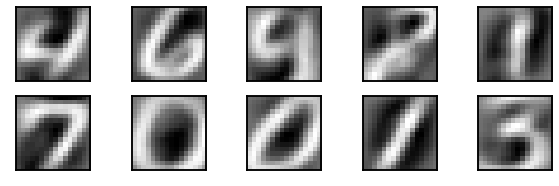

In [34]:
# show feature W, it's similar to K-means
fig, axs = plt.subplots(2, 5, figsize=(10,3))
for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(nonneg_sim_match.W[i].cpu().numpy().reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 2.6 Nonnegative Similarity Matching - Neural Network Algorithms

In [35]:
# substantialize similarity matching principle for centered MNIST data
# explore the effect of learning rates
# Y (and M) are nonnegative
# undercomplete, offline setting, rank is up to k

base_eta = 0.05
tau_list = [0.1, 0.5, 1.0, 1.5]

nonneg_sim_match_nn_rls = {tau: CorrGame(n=256, k=10, 
                            Phi=lambda W, X: (W*W).sum()/2,
                            Psi=lambda M, X: (M*M).sum()/2,
                            dPhi = lambda W, X:W,
                            dPsi = lambda M, X:M,
                            constraints = {'Y': F.relu,
                                           'W': lambda x:x,
                                           'M': lambda x:x},
                            eta= {'Y': 0.01, 'W': base_eta, 'M': base_eta/tau},
                            device=device)
                    for tau in tau_list}

In [36]:
# substantialize similarity matching logger

nonneg_sim_match_nn_rls_loggers = {tau: Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y|^2": lambda model, x: (model.Y * model.Y).sum(),
    "|W|^2": lambda model, x: (model.W * model.W).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "|XX-YY|^2": similarity_diff
}) for tau in tau_list}

In [37]:
%%time
for tau in tau_list:
    train_offline(nonneg_sim_match_nn_rls[tau], torch.Tensor(X).to(device), nonneg_sim_match_nn_rls_loggers[tau], 
                  mode='NN',
                  niter=3000)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

CPU times: user 27min 48s, sys: 26.6 s, total: 28min 14s
Wall time: 27min 57s


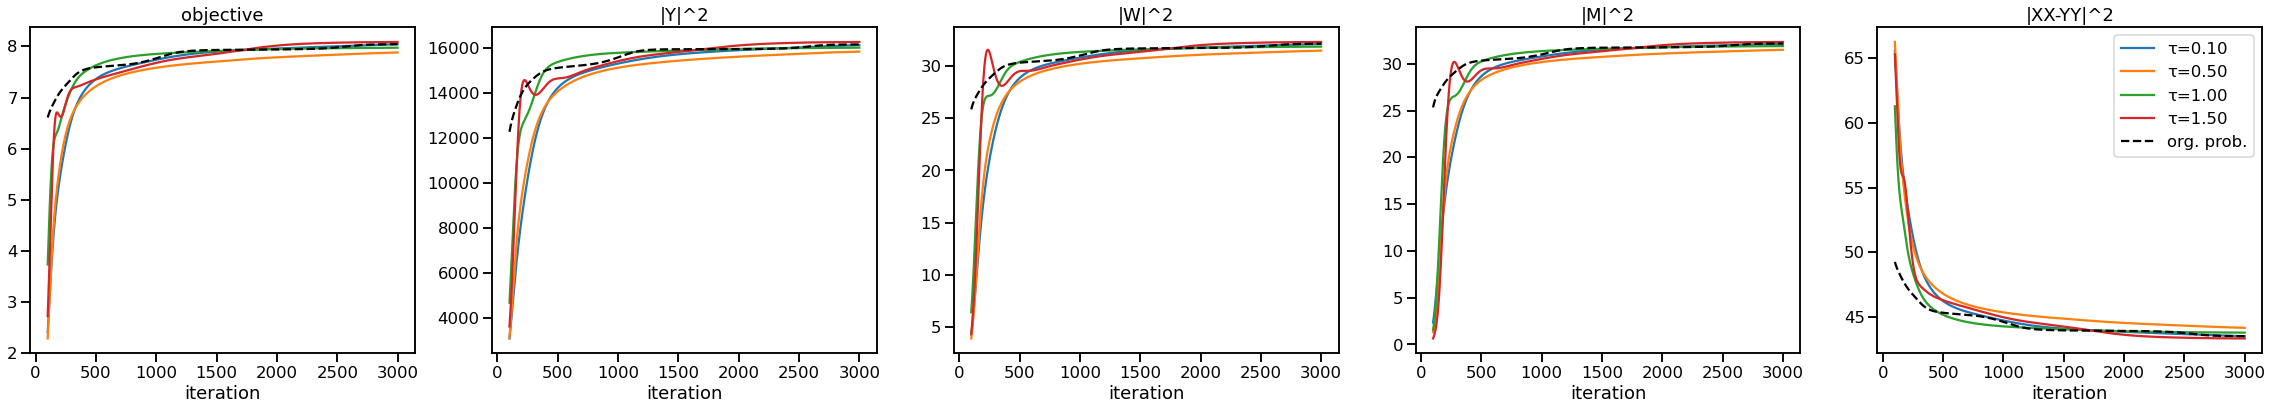

In [38]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
for tau in tau_list:
    for ax, eval_key in zip(axs, nonneg_sim_match_nn_rls_loggers[tau].history.keys()):
        ax.plot(range(3000)[100:], [s.cpu().numpy() for s in nonneg_sim_match_nn_rls_loggers[tau].history[eval_key]][100:], 
                label="τ={:.2f}".format(tau))
        ax.set_title(eval_key)
        ax.set_xlabel("iteration")

for ax, eval_key in zip(axs, nonneg_sim_match_logger.history.keys()):
    ax.plot(range(3000)[100:], [s.cpu().numpy() for s in nonneg_sim_match_logger.history[eval_key]][100:], 
            'k--', label="org. prob.")
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
        
plt.legend()
plt.show()

#### 2.7 Nonnegative Independent Component Analysis - Original Problem

In [39]:
# substantialize NICA for centered MNIST data
# Y (and M) are nonnegative
# undercomplete, offline setting, rank is up to k

nonneg_ica = CorrGame(n=256, k=50, 
                        Phi=lambda W, X: (W.mm(X.mm(X.transpose(0,1))/X.size(1))*W).sum()/2,
                        Psi=lambda M, X: (M*M).sum()/2,
                        dPhi = lambda W, X:W.mm(X.mm(X.transpose(0,1))/X.size(1)),
                        dPsi = lambda M, X:M,
                        constraints = {'Y': lambda x:F.relu(x),
                                       'W': lambda x:x,
                                       'M': lambda x:x},
                        eta= {'Y': 60.0, 'W': 0.001, 'M': 0.001},
                        device=device)

# torch.inverse(x.mm(x.transpose(0,1))/x.size(1))
a = torch.Tensor(X).to(device)
c_aa = a.mm(a.transpose(0,1))/a.size(1)
c_aa_inv = torch.inverse(c_aa)

# provide known closed form solutions to W and M
closed_form_dual = {"W": lambda y, w, m, x: nonneg_ica.corr(y,x).mm(c_aa_inv),
                    "M": lambda y, w, m, x: nonneg_ica.corr(y,y)}

In [40]:
# substantialize similarity matching logger

def similarity_diff_whitened(model, x):
    diff = x.transpose(0,1).mm(
                c_aa_inv
            ).mm(x) - model.Y.transpose(0,1).mm(model.Y)
    diff = diff / x.size(1)
    return (diff * diff).sum()

nonneg_ica_logger = Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y|^2": lambda model, x: (model.Y * model.Y).sum(),
    "|W|^2": lambda model, x: (model.W * model.W).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "|X(C^-1)X-YY|^2": similarity_diff_whitened
})

In [41]:
%%time
train_offline(nonneg_ica, torch.Tensor(X).to(device), nonneg_ica_logger, 
              init='whiten', mode='YWM', closed_form=closed_form_dual, niter=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]

CPU times: user 4.34 s, sys: 2.58 s, total: 6.91 s
Wall time: 3.7 s


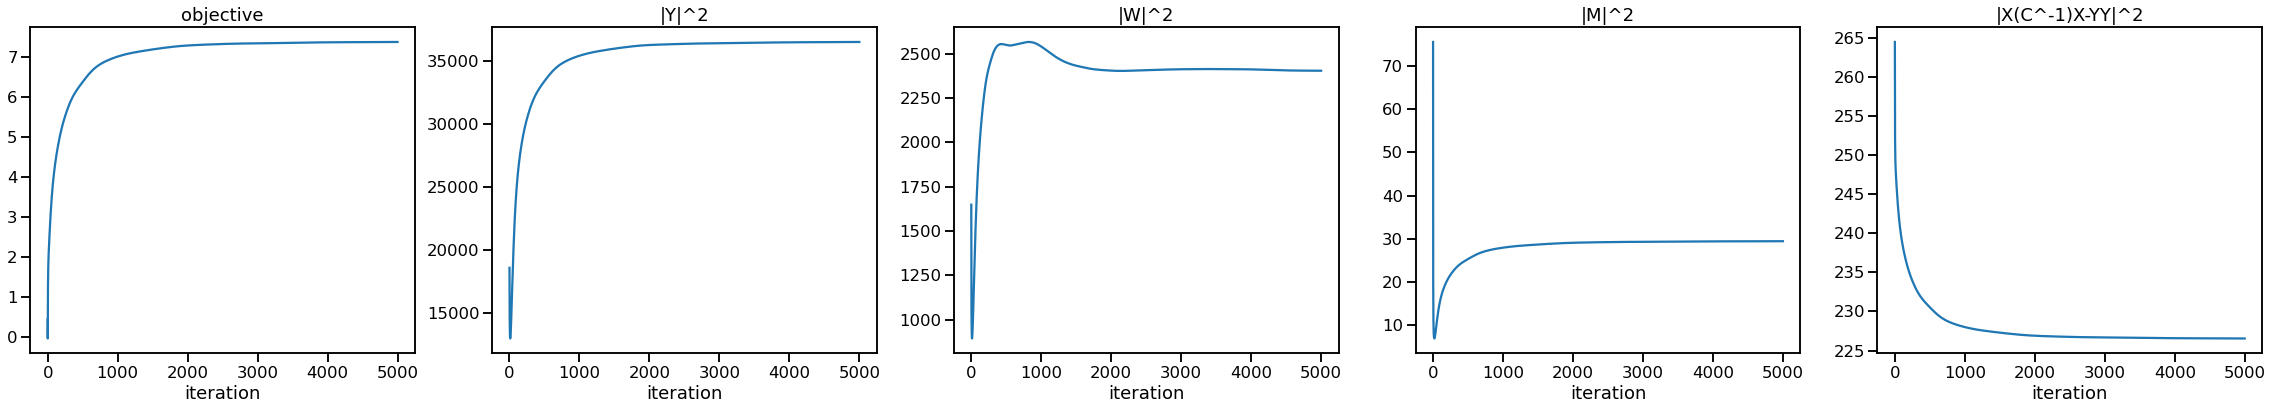

In [42]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
for ax, eval_key in zip(axs, nonneg_ica_logger.history.keys()):
    ax.plot([s.cpu().numpy() for s in nonneg_ica_logger.history[eval_key]])
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
plt.show()

In [43]:
# check the relationship between CorrGame and NonNegSimMatch
a = torch.Tensor(X).to(device)
U_a, S_a, Vh_a = torch.svd(a/np.sqrt(a.size(1)))
c_aa = a.mm(a.transpose(0,1))/a.size(1)
print(((a.transpose(0,1).mm(torch.inverse(c_aa)).mm(a)/a.size(1))**2).sum() / 4 - nonneg_ica_logger.history["|X(C^-1)X-YY|^2"][-1]/4)
print(nonneg_ica_logger.history["objective"][-1])

tensor(7.3653, device='cuda:0')
tensor(7.3653, device='cuda:0')


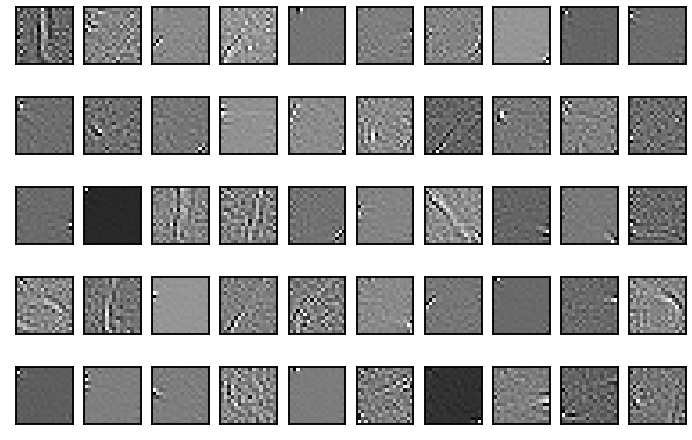

In [44]:
# show feature W
fig, axs = plt.subplots(5, 10, figsize=(12,8))
for i, ax in enumerate(axs.reshape(-1)):
    x = torch.Tensor(X).to(device)
    ax.imshow(nonneg_ica.W[i].cpu().numpy().reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

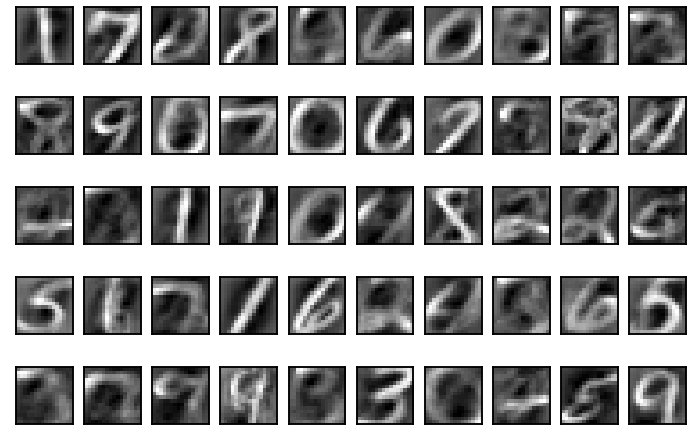

In [45]:
# show WC_x
fig, axs = plt.subplots(5, 10, figsize=(12,8))
for i, ax in enumerate(axs.reshape(-1)):
    x = torch.Tensor(X).to(device)
    cxx = x.mm(x.transpose(0,1))/x.size(1)
    ax.imshow(nonneg_ica.W.mm(cxx)[i].cpu().numpy().reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 2.8 Nonnegative Independent Component Analysis - Neural Network Algorithms

In [46]:
# substantialize similarity matching principle for centered MNIST data
# explore the effect of learning rates
# Y (and M) are nonnegative
# undercomplete, offline setting, rank is up to k

base_eta = 0.1
tau_list = [0.1, 0.5, 1.0, 1.5]

nonneg_ica_nn_rls = {tau: CorrGame(n=256, k=50, 
                            Phi=lambda W, X: (W.mm(X.mm(X.transpose(0,1))/X.size(1))*W).sum()/2,
                            Psi=lambda M, X: (M*M).sum()/2,
                            dPhi = lambda W, X:W.mm(X.mm(X.transpose(0,1))/X.size(1)),
                            dPsi = lambda M, X:M,
                            constraints = {'Y': F.relu,
                                           'W': lambda x:x,
                                           'M': lambda x:x},
                            eta= {'Y': 0.1, 'W': base_eta, 'M': base_eta/tau},
                            device=device)
                    for tau in tau_list}

In [47]:
# substantialize similarity matching logger

nonneg_ica_nn_rls_loggers = {tau: Logger({
    "objective": lambda model, x: model.objective(x),
    "|Y|^2": lambda model, x: (model.Y * model.Y).sum(),
    "|W|^2": lambda model, x: (model.W * model.W).sum(),
    "|M|^2": lambda model, x: (model.M * model.M).sum(),
    "|X(C^-1)X-YY|^2": similarity_diff_whitened
}) for tau in tau_list}

In [48]:
%%time
for tau in tau_list:
    train_offline(nonneg_ica_nn_rls[tau], torch.Tensor(X).to(device), nonneg_ica_nn_rls_loggers[tau], 
                  init='whiten',
                  mode='NN',
                  niter=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

CPU times: user 48min 2s, sys: 2min 7s, total: 50min 9s
Wall time: 49min 48s


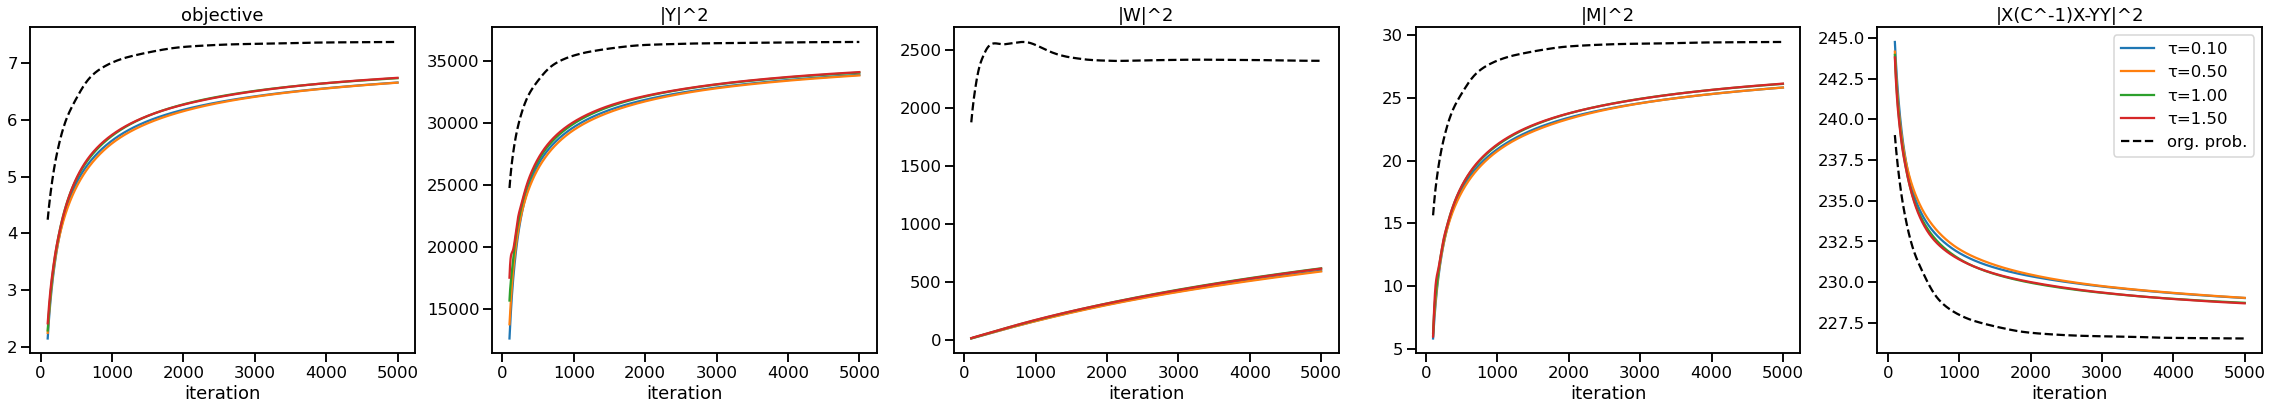

In [50]:
fig, axs = plt.subplots(1, 5, figsize=(40,6))
for tau in tau_list:
    for ax, eval_key in zip(axs, nonneg_ica_nn_rls_loggers[tau].history.keys()):
        ax.plot(range(5000)[100:], [s.cpu().numpy() for s in nonneg_ica_nn_rls_loggers[tau].history[eval_key]][100:], 
                label="τ={:.2f}".format(tau))
        ax.set_title(eval_key)
        ax.set_xlabel("iteration")

for ax, eval_key in zip(axs, nonneg_ica_logger.history.keys()):
    ax.plot(range(5000)[100:], [s.cpu().numpy() for s in nonneg_ica_logger.history[eval_key]][100:], 
            'k--', label="org. prob.")
    ax.set_title(eval_key)
    ax.set_xlabel("iteration")
        
plt.legend()
plt.show()

The condition number of $C_{xx}$ is large ($\lambda_{max}/\lambda_{min}\approx 4919.33$). $W$ converges slowly with Hebbian updates.